# Analysis of RMQ Benchmark Results

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
# Load the JSON file
with open('RMQ_Results2.json') as f:
    data = json.load(f)

## Context

In [3]:
context = data['context']
display(context)

{'date': '2025-09-27T22:30:54-00:00',
 'host_name': 'DELLG16',
 'executable': 'C:\\Users\\fstei\\CLionProjects\\LCS-Solver\\cmake-build-debug\\benchmark\\Bench_RMQ.exe',
 'num_cpus': 20,
 'mhz_per_cpu': 2803,
 'caches': [{'type': 'Data', 'level': 1, 'size': 49152, 'num_sharing': 2},
  {'type': 'Instruction', 'level': 1, 'size': 32768, 'num_sharing': 2},
  {'type': 'Unified', 'level': 2, 'size': 1310720, 'num_sharing': 2},
  {'type': 'Unified', 'level': 3, 'size': 25165824, 'num_sharing': 20}],
 'load_avg': [],
 'library_version': 'v1.9.1',
 'library_build_type': 'release',
 'json_schema_version': 1}

## Read in Benchmark Results

In [4]:
benchmarks = data['benchmarks']
df = pd.DataFrame(benchmarks)
df[['series', 'N']] = df['name'].str.split('/', n=1, expand=True)
df

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,series,N
0,BM_SETUP_RMQ_ONN/100,0,0,BM_SETUP_RMQ_ONN/100,iteration,1,0,1,11200,4.869195e+04,5.022321e+04,ns,BM_SETUP_RMQ_ONN,100
1,BM_SETUP_RMQ_ONN/600,0,1,BM_SETUP_RMQ_ONN/600,iteration,1,0,1,498,1.593469e+06,1.568775e+06,ns,BM_SETUP_RMQ_ONN,600
2,BM_SETUP_RMQ_ONN/1100,0,2,BM_SETUP_RMQ_ONN/1100,iteration,1,0,1,100,5.142129e+06,5.312500e+06,ns,BM_SETUP_RMQ_ONN,1100
3,BM_SETUP_RMQ_ONN/1600,0,3,BM_SETUP_RMQ_ONN/1600,iteration,1,0,1,56,1.095196e+07,1.088170e+07,ns,BM_SETUP_RMQ_ONN,1600
4,BM_SETUP_RMQ_ONN/2100,0,4,BM_SETUP_RMQ_ONN/2100,iteration,1,0,1,32,1.977359e+07,1.953125e+07,ns,BM_SETUP_RMQ_ONN,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,BM_QUERY_NO_RMQ/7600,8,15,BM_QUERY_NO_RMQ/7600,iteration,1,0,1,18584,2.832436e+04,3.110875e+04,ns,BM_QUERY_NO_RMQ,7600
176,BM_QUERY_NO_RMQ/8100,8,16,BM_QUERY_NO_RMQ/8100,iteration,1,0,1,24889,3.013345e+04,2.950601e+04,ns,BM_QUERY_NO_RMQ,8100
177,BM_QUERY_NO_RMQ/8600,8,17,BM_QUERY_NO_RMQ/8600,iteration,1,0,1,32000,3.265130e+04,4.101562e+04,ns,BM_QUERY_NO_RMQ,8600
178,BM_QUERY_NO_RMQ/9100,8,18,BM_QUERY_NO_RMQ/9100,iteration,1,0,1,23579,3.398703e+04,4.042262e+04,ns,BM_QUERY_NO_RMQ,9100


## Generate Figure

Please note that the unit of the y axis changes automatically. Usually, the unit of the CPU time is between $10^3$ to $10^7$ nano seconds.

In [5]:
def plot_cpu_time_over_N(df, series_name):
    # Filter the DataFrame for the given series and plot it
    df_filtered = df[df['series'] == series_name].copy()
    ax = df_filtered.plot(x='N', y='cpu_time', kind='line', marker='o', figsize=(10, 6), grid=True)
    
    # Set plot labels and title
    ax.set_xlabel('Number of Elements in RMQ data structure N')
    ax.set_ylabel('CPU Time (ns) t')
    ax.set_title(f'CPU Time over N for {series_name}')    

    # Set y-axis to exponential format
    ax.get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

### Linear Search for Maximum

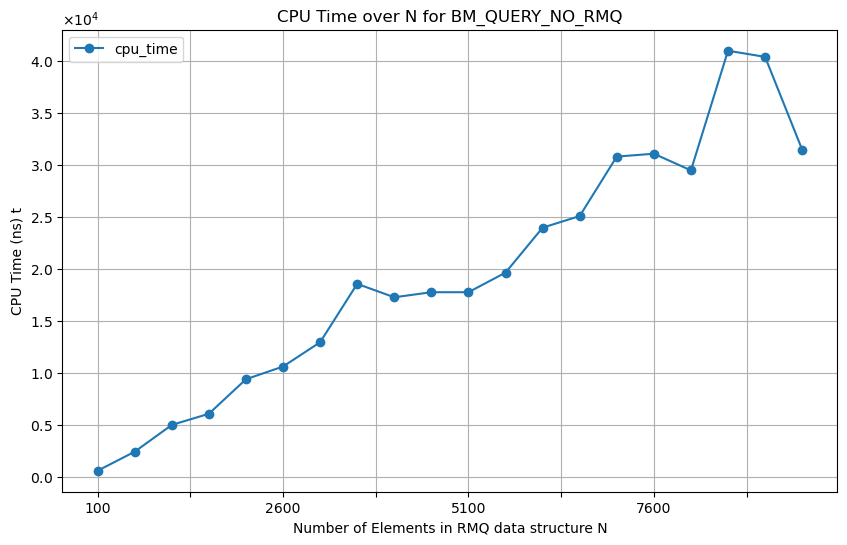

In [6]:
plot_cpu_time_over_N(df, 'BM_QUERY_NO_RMQ')

### Setup

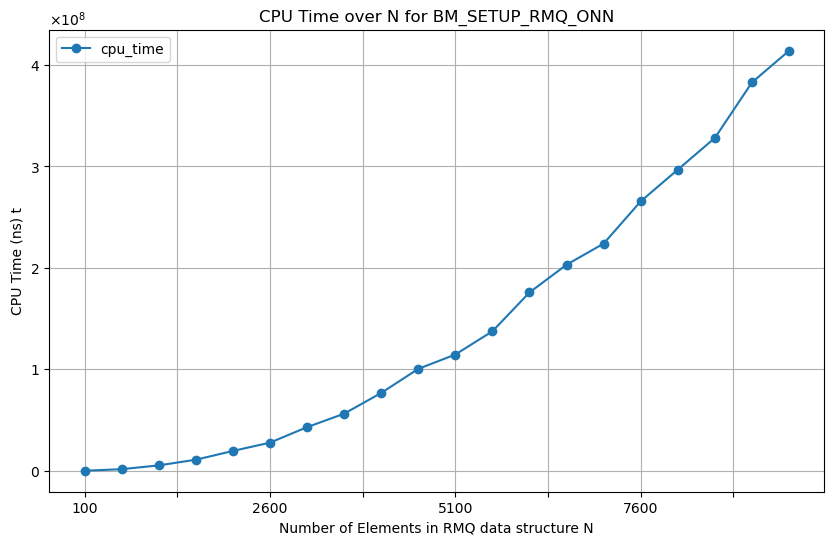

In [7]:
plot_cpu_time_over_N(df, 'BM_SETUP_RMQ_ONN')

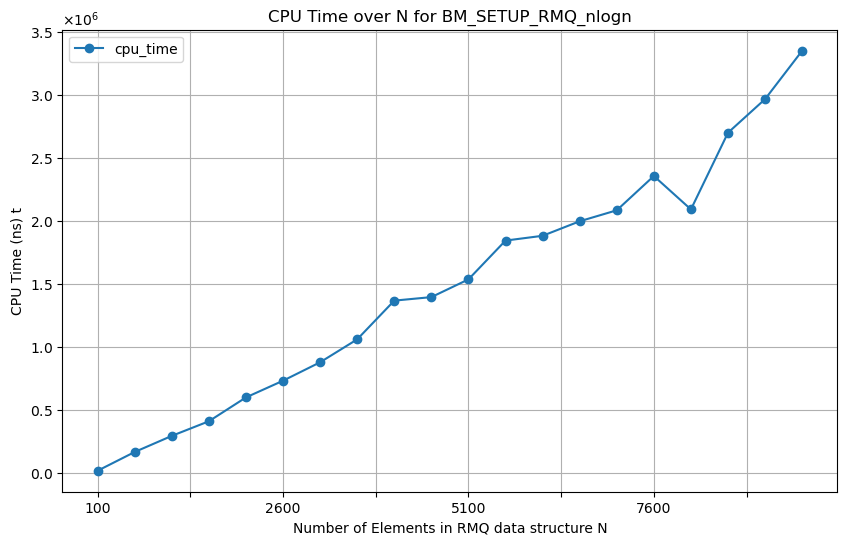

In [8]:
plot_cpu_time_over_N(df, 'BM_SETUP_RMQ_nlogn')

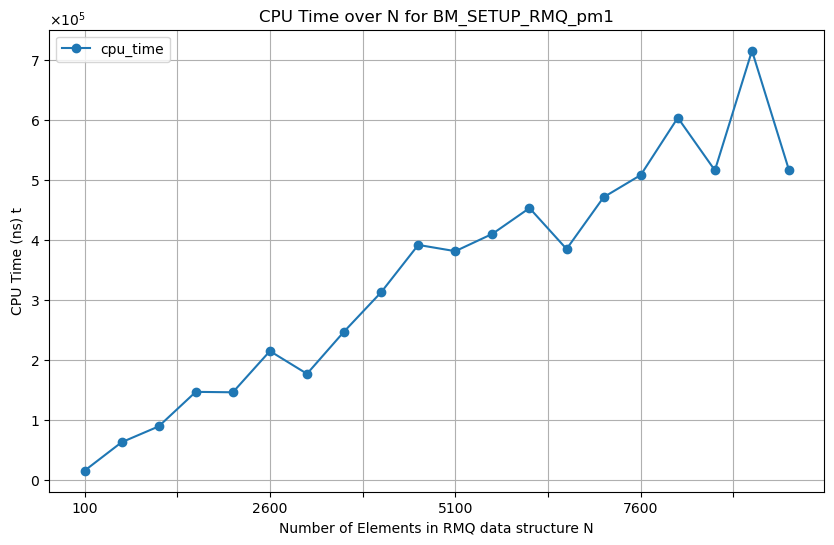

In [9]:
plot_cpu_time_over_N(df, 'BM_SETUP_RMQ_pm1')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


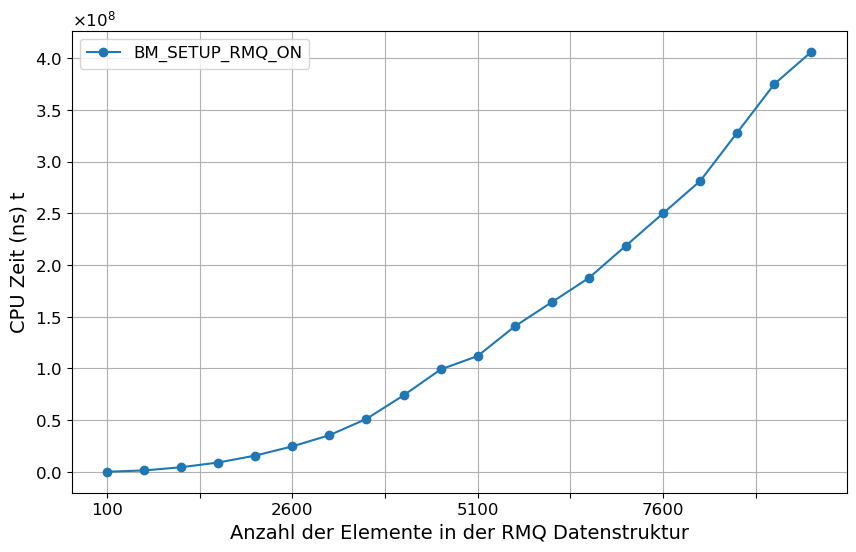

In [16]:
plot_cpu_time_over_N(df, 'BM_SETUP_RMQ_ON')

### Query

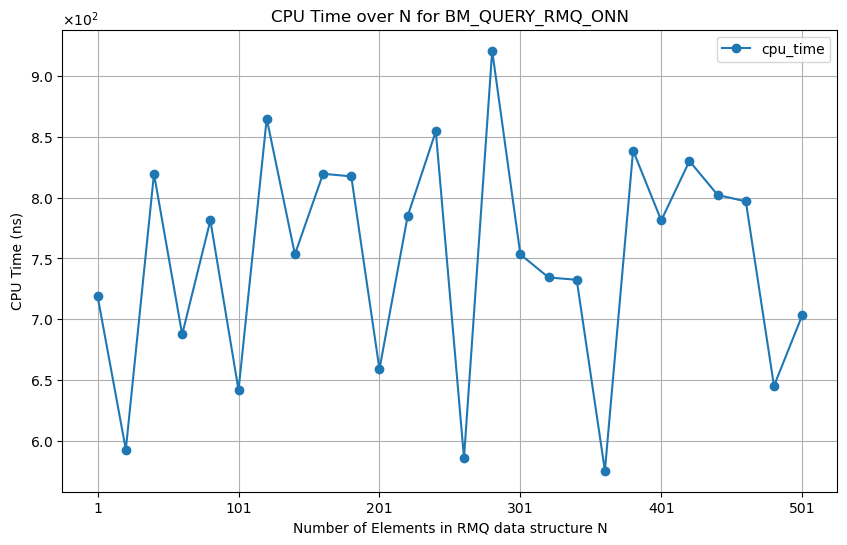

In [54]:
plot_cpu_time_over_N(df, 'BM_QUERY_RMQ_ONN')

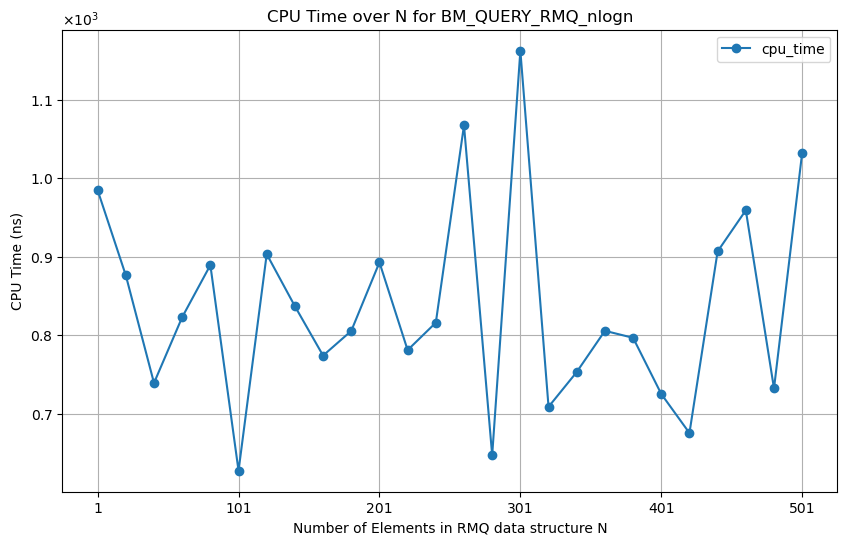

In [55]:
plot_cpu_time_over_N(df, 'BM_QUERY_RMQ_nlogn')

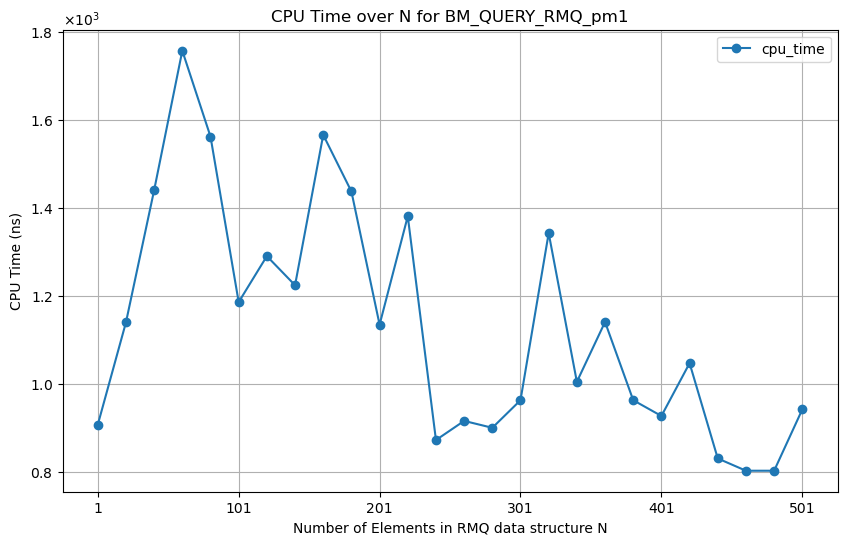

In [56]:
plot_cpu_time_over_N(df, 'BM_QUERY_RMQ_pm1')

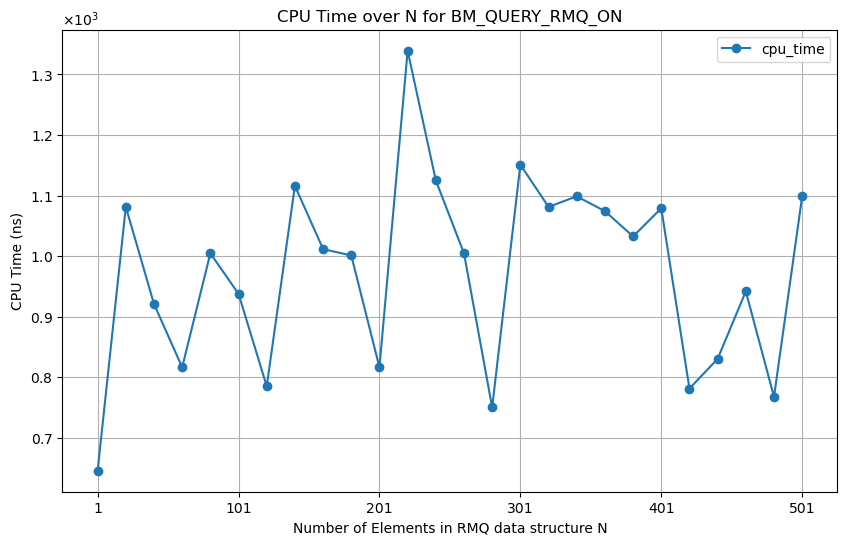

In [57]:
plot_cpu_time_over_N(df, 'BM_QUERY_RMQ_ON')